# Esercitazione: Stima delle curve di possibilità pluvimetrica

L'obiettivo di questo Notebook è quello di illustrare quali sono i vari metodi per la stima dei parametri che servono per poter plottare le curve di possibilità pluviometrica. Partendo dai dati raccolti dalla stazione meteo di Folgaria (T0210), ci riporteremo alla famiglia di curve probabilistiche di Gumbel, confrontando i risultati dello studio statistico e ricavando, infine, i parametri. 

## Sommario:                                                                                                                                           
1-Introduzione e manipolazione dati                                                                                                                                   
2-Metodo dei Momenti                                                                                                                                                    
3-Metodo della massima verosimiglianza                                                                                                                          
4-Metodo dei Minimi Quadrati                                                                                                                                      
5-Test di Pearson                                                                                                                                      
6-Stima delle curve di possibilità pluviometrica                                                                                                                                           

## 1-Introduzione e manipolazione dei dati

## Dettagli stazione metereologica
La stazione metereologica di riferimento è quella di Folgaria, collocata a un'altezza di circa 1140 metri s.l.m. (la posizione specifica è cambiata di qualche decina di metri nel corso dell'ultimo secolo).                                                                                                  
Dettagli:                                                                                                                                              
Stazione: T0210                                                                                                                                        
Tavoletta n.: 32 081070                                                                                                                                
Coordinate Est/Nord: 667845/5086920                                                                                                                    
Latitudine: 45°54’55.3” N                                                                                                                              
Longitudine: 11°09’51.7” E


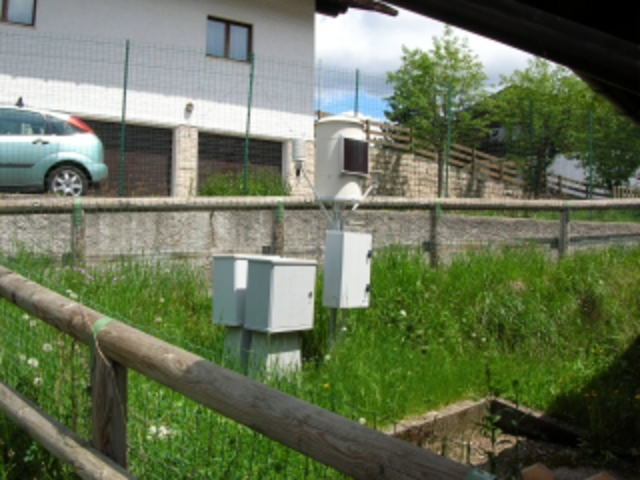

In [1]:
from IPython.display import Image 

Image("staz_folgaria.jpg")

Si importa la libreria per modificare la directory.

In [2]:
import os
os.getcwd()

'C:\\Users\\E580\\Desktop\\UNI\\Idrologia\\Hydrology_group_work\\esercitzione1'

In [3]:
os.listdir()

['.ipynb_checkpoints',
 '.~lock.massimi di precipitazione.xls#',
 'abs_m',
 'abs_mle',
 'abs_mq',
 'best_param',
 'DatiFolgaria.txt',
 'ESERCITAZIONE1.ipynb',
 'esercitazione1_.ipynb',
 'massimi di precipitazione.xls',
 'staz_folgaria.jpg']

Si importa la libreria pandas.

In [4]:
import pandas as pd

Si leggono i dati con pandas e si visualizzano in un DataFrame.

In [5]:
data = pd.read_csv('DatiFolgaria.txt')
data

,anno,1h,3h,6h,12h,24h
0,1960,21.6,21.8,21.1,21.12,21.14
1,1961,24.6,26.6,33.0,33.60,58.00
2,1962,22.8,26.8,40.2,71.00,77.20
3,1963,NaN,NaN,NaN,NaN,NaN
4,1964,23.0,25.4,29.2,47.80,73.60
5,1965,21.8,50.6,77.2,121.20,190.20
6,1966,24.2,39.0,74.0,117.00,167.40
7,1967,12.0,23.6,27.4,27.40,43.80
8,1968,26.2,37.0,52.6,54.80,57.80
9,1969,23.6,25.8,31.2,32.40,54.60


Nel DataFrame gli anni sono considerati come valori. Si vuole invece che essi fungano da indice e che siano riconosciuti come una data con il formato corretto, perciò si importa il pacchetto datetime e si usa la funzione map.

In [6]:
import datetime as datetime
map(datetime,data['anno'])
data = data.set_index('anno')
data

,1h,3h,6h,12h,24h
anno,,,,,
1960,21.6,21.8,21.1,21.12,21.14
1961,24.6,26.6,33.0,33.60,58.00
1962,22.8,26.8,40.2,71.00,77.20
1963,NaN,NaN,NaN,NaN,NaN
1964,23.0,25.4,29.2,47.80,73.60
1965,21.8,50.6,77.2,121.20,190.20
1966,24.2,39.0,74.0,117.00,167.40
1967,12.0,23.6,27.4,27.40,43.80
1968,26.2,37.0,52.6,54.80,57.80


Ora gli anni sono usati come indici per i valori di precipitazione.

# Interpolazione delle curve di Gumbel

Si importano le librerie necessarie per i prossimi calcoli.

In [7]:
import math
%matplotlib inline 
import matplotlib.pyplot as plt
from scipy.stats import genextreme, gumbel_r
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF

## 2-Metodo dei momenti

L'espressione della famiglia parametrica di curve di Gumbel:
$$ P[H<h; a,b] = e^{-e^{-{\frac{h-a}{b}}}}$$
È noto inoltre che il valore atteso di $H$, è:
$$ E[H;a,b] = b \gamma + a $$
dove $\gamma = 0.572$ è il numero irrazionale detto di Eulero-Mascheroni.
Il valore della varianza è invece:
$$ Var[H;a,b] = b^2 \frac{\pi^2}{6}$$
Il metodo dei momenti consiste nell'uguagliare media e varianza del campione con media e varianza della popolazione.                                      
Se  il  modello  probabilistico  contiene t parametri, allora il metodo  dei momenti consiste nell’ugugliare i t momenti campionari con i t momenti della popolazione.                                                                  
Per ottenere un numero sufficiente di equazioni bisogna considerare tanti momenti quanti sono i parametri.

In questo caso, i parametri considerati sono 2: media e varianza.

Si calcolano, però, le medie e le deviazioni standard, perchè il metodo dei momenti si riduce alla risoluzione di:
\begin{equation}
\left\{
\begin{array}{l}
b \gamma + a = \mu_H \\
b^2\frac{\pi^2}{6} = \sigma^2_H
\end{array}
\right.
\end{equation}
Dalla seconda equazione si ricava:
\begin{equation}
b = \frac{\sqrt{6}}{\pi} \sigma_H
\end{equation}
che, sostituito nella prima equazione, dà:
\begin{equation}
a = \mu_H -\frac{\sqrt{6}\gamma}{\pi} \sigma_H 
\end{equation}

Dunque, sarà necessario calcolare solamente la deviazione standard, al posto della varianza (+la media ovviamente).

In [8]:
means = data.mean()
means

1h     25.733333
3h     33.926667
6h     44.496667
12h    63.324000
24h    92.024667
dtype: float64

Si calcola la deviazione standard dei dati.

In [9]:
stds = data.std()
stds

1h     10.445568
3h     11.978427
6h     13.926420
12h    24.845387
24h    41.278366
dtype: float64

Si definisce una funzione che calcola i parametri di Gumbel a e b e li restituisce in un DataFrame. I parametri vengono calcolati isolandoli nelle espressioni della media e della varianza.

In [10]:
EulerGamma = 0.577215664901532860606512090
def GumbelSystemSolutions (_means, _stds):
    return pd.DataFrame([_means - math.sqrt(6)/math.pi * EulerGamma * _stds, math.sqrt(6)/math.pi * _stds],index=["a","b"])
abs_m = GumbelSystemSolutions(means,stds)
abs_m

,1h,3h,6h,12h,24h
a,21.032272,28.535737,38.229037,52.142254,73.447206
b,8.144376,9.339541,10.858385,19.371869,32.184610


Si salvano i parametri di Gumbel.

In [11]:
abs_m.to_pickle("abs_m")

Per disegnare le curve di Gumbel si definisce una funzione che restituirà i valori dei punti che formano le curve di Gumbel. Si costruisce inoltre un array di valori di precipitazioni che verrà usato come asse delle ascisse per plottare le curve. I valori sono ottenuti con la funzione linspace che restituisce valori equidistanti su un intervallo delimitato dal minimo e dal massimo fra i valori di altezza di precipitazione.

In [12]:
t_rain = np.linspace(data.min()[0],data.max()[4],100)

La funzione gumbel richiede 3 parametri, il primo corrisponde ai valori di altezza di precipitazione, il secondo è il DataFrame che contiene i parametri e il terzo specifica l'intervallo di tempo. La funzione applica la formula parametrica per le curve di Gumbel usando i parametri forniti.

In [13]:
def gumbel(h, abs_d, duration):
    return np.exp(-np.exp(-(h - abs_d[duration]["a"]) / abs_d[duration]["b"]))

Si costruisce poi un DataFrame con i valori delle curve di Gumbel per ogni intervallo di tempo, usando la funzione appena definita, e si usa l'array costruito in precedenza come indice.

In [14]:
gumbel_dataframe = pd.DataFrame([gumbel(t_rain,abs_m,"1h"), gumbel(t_rain,abs_m,"3h"), gumbel(t_rain,abs_m,"6h"), gumbel(t_rain,abs_m,"12h"), gumbel(t_rain,abs_m,"24h")]).T
gumbel_dataframe.index = t_rain
gumbel_dataframe.columns = ["1h","3h","6h","12h","24h"]
gumbel_dataframe

,1h,3h,6h,12h,24h
12.0,0.048249,0.002812,0.000014,0.000355,0.001174
13.8,0.088012,0.007874,0.000076,0.000719,0.001694
15.6,0.142505,0.018407,0.000323,0.001367,0.002397
17.4,0.209710,0.037078,0.001104,0.002454,0.003328
19.2,0.285849,0.066061,0.003123,0.004183,0.004539
...,...,...,...,...,...
183.0,1.000000,1.000000,0.999998,0.998836,0.967303
184.8,1.000000,1.000000,0.999999,0.998939,0.969053
186.6,1.000000,1.000000,0.999999,0.999033,0.970712
188.4,1.000000,1.000000,0.999999,0.999119,0.972282


Per costruire il grafico si plottano i valori del DataFrame gb.

Text(0, 0.5, 'Probabilità cumulata')

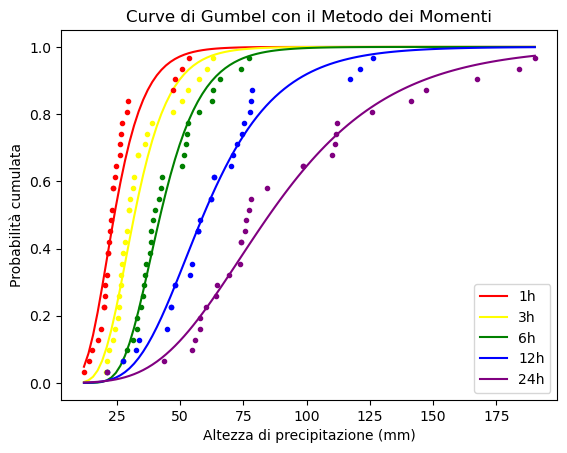

In [15]:
plt.rc('xtick', labelsize = 10) 
plt.rc('ytick', labelsize = 10)
plt.style.use('default')
graph = gumbel_dataframe.plot(color = ["red","yellow","green","blue","purple"])
ecdf1h = ECDF(data["1h"])
graph.plot(data["1h"],ecdf1h(data["1h"]), '.', c = "red", label = "1h")
ecdf3h = ECDF(data["3h"])
graph.plot(data["3h"],ecdf3h(data["3h"]), '.', c = "yellow", label = "3h")
ecdf6h = ECDF(data["6h"])
graph.plot(data["6h"],ecdf6h(data["6h"]), '.', c = "green", label = "6h")
ecdf12h = ECDF(data["12h"])
graph.plot(data["12h"],ecdf12h(data["12h"]), '.', c="blue", label = "12h")
ecdf24h = ECDF(data["24h"])
graph.plot(data["24h"],ecdf24h(data["24h"]), '.', c = "purple", label = "24h")
#graph.grid(True)
graph.set_title('Curve di Gumbel con il Metodo dei Momenti')
graph.set_xlabel('Altezza di precipitazione (mm)')
graph.set_ylabel('Probabilità cumulata')

In [16]:
data.sort_values("1h")

,1h,3h,6h,12h,24h
anno,,,,,
1967,12.0,23.6,27.4,27.40,43.80
1979,14.0,31.4,41.6,62.40,110.00
1984,15.2,24.4,32.8,44.80,64.20
1975,17.4,20.6,36.0,54.00,76.00
1985,18.6,31.6,36.4,47.80,78.20
1986,20.0,21.2,39.2,78.40,141.40
1978,20.0,33.2,51.6,77.60,126.00
1988,20.2,28.2,38.6,57.00,74.00
1982,20.4,33.2,43.0,70.20,84.20


## 3-Metodo della massima verosimiglianza

Il metodo della massima verosimiglianza calcola i valori dei parametri per cui  la probabilità congiunta di ottenere una serie di dati $\{h_1, \cdot \cdot, h_n \}$ è massima:
\begin{equation}
{\rm argmax}_{a,b} P[\{h_1, \cdot \cdot, h_n \};a,b] = {\rm argmax}_{a,b} \prod_i^n P[h_i;a,b]
\end{equation}

Il pacchetto gumbel_r contiene la funzione fit() che consente di ricavare i parametri con il metodo della massima verosimiglianza da una serie di dati. Si applica la funzione fit() a ciascuna colonna del dataframe contenente i dati e si riuniscono i parametri ricavati in un DataFrame che viene poi salvato in formato pickle.

In [17]:
parameters = []
for col in data.columns:
    parameters.append(gumbel_r.fit(data[col].dropna()))
abs_mle = pd.DataFrame(parameters, columns = ["a","b"], index = ["1h","3h","6h","12h","24h"]).T
abs_mle.to_pickle("abs_mle")
abs_mle

,1h,3h,6h,12h,24h
a,21.508280,28.884421,38.182855,52.180711,73.618009
b,6.644891,7.709283,10.847653,19.895890,31.609248


Si costruisce un DataFrame usando la stessa funzione definita per il metodo dei momenti, questa volta usando i paramentri abs_mle.

In [18]:
gumbel_dataframe = pd.DataFrame([gumbel(t_rain,abs_mle,"1h"), gumbel(t_rain,abs_mle,"3h"), gumbel(t_rain,abs_mle,"6h"), gumbel(t_rain,abs_mle,"12h"), gumbel(t_rain,abs_mle,"24h")]).T
gumbel_dataframe.index = t_rain
gumbel_dataframe.columns = ["1h","3h","6h","12h","24h"]
gumbel_dataframe

,1h,3h,6h,12h,24h
12.0,0.015260,0.000132,0.000014,0.000534,0.000890
13.8,0.041171,0.000845,0.000077,0.001025,0.001313
15.6,0.087769,0.003689,0.000329,0.001859,0.001896
17.4,0.156344,0.011847,0.001122,0.003202,0.002682
19.2,0.242841,0.029835,0.003169,0.005263,0.003722
...,...,...,...,...,...
183.0,1.000000,1.000000,0.999998,0.998606,0.969072
184.8,1.000000,1.000000,0.999999,0.998727,0.970759
186.6,1.000000,1.000000,0.999999,0.998837,0.972355
188.4,1.000000,1.000000,0.999999,0.998938,0.973865


Anche qui, si plottano i valori del DataFrame.

Text(0, 0.5, 'Probabilità cumulata')

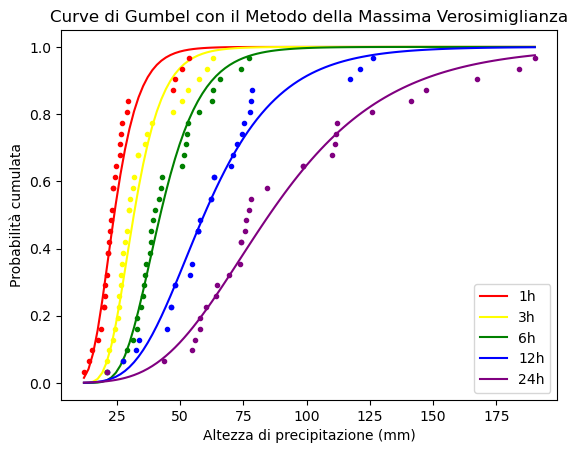

In [19]:
plt.rc('xtick', labelsize = 10) 
plt.rc('ytick', labelsize = 10)
graph = gumbel_dataframe.plot(color = ["red","yellow","green","blue","purple"])
ecdf1h = ECDF(data["1h"])
graph.plot(data["1h"],ecdf1h(data["1h"]), '.', c = "red", label = "1h")
ecdf3h = ECDF(data["3h"])
graph.plot(data["3h"],ecdf3h(data["3h"]), '.', c = "yellow", label = "3h")
ecdf6h = ECDF(data["6h"])
graph.plot(data["6h"],ecdf6h(data["6h"]), '.', c = "green", label = "6h")
ecdf12h = ECDF(data["12h"])
graph.plot(data["12h"],ecdf12h(data["12h"]), '.', c="blue", label = "12h")
ecdf24h = ECDF(data["24h"])
graph.plot(data["24h"],ecdf24h(data["24h"]), '.', c = "purple", label = "24h")
#graph.grid(True)
graph.set_title('Curve di Gumbel con il Metodo della Massima Verosimiglianza')
graph.set_xlabel('Altezza di precipitazione (mm)')
graph.set_ylabel('Probabilità cumulata')

## 4-Metodo dei minimi quadrati

Il metodo consiste nel definire lo scarto quadratico tra le misure di ECDF e la probabilità di non superamento, minimizzando i risultati per cercare il minimo della funzione:
\begin{equation} 
\delta^2(a,b) = \sum_i^N (ECDF_i-P[h_i;a,b])^2 \to \rm min 
\end{equation}

Tale minimizzazione si ottiene derivando l’espressione dello scarto rispetto agli m parametri, ottenendo così le m equazioni in m incognite necessarie.

Risulta, dunque, un sistema non lineare, che deve essere risolto con un metodo iterativo, come il Metodo di Eulero/della Bisezione oppure il Metodo di Newton-Raphson-Simpson.


In [20]:
from scipy.optimize import least_squares

Si definisce la funzione che calcola lo scarto quadratico.

In [21]:
def scarto(x, t, func):
    return np.exp(-np.exp(-(t-x[0])/x[1])) - func

Si applica la funzione least_squares per ottenere i parametri stimati con il metodo dei minimi quadrati.

In [22]:
ecdf1h = ECDF(data["1h"].dropna())
x0 = [22., 7.]
t_train = sorted(data["1h"].dropna())
y_train = ecdf1h(t_train)
lsq1h = least_squares(scarto, x0, args = (t_train, y_train))
lsq1h.x

array([21.13941348,  4.30066743])

In [23]:
ecdf3h = ECDF(data["3h"].dropna())
x0 = [29., 8.]
t_train = sorted(data["3h"].dropna())
y_train = ecdf3h(t_train)
lsq3h = least_squares(scarto, x0, args = (t_train, y_train))
lsq3h.x

array([27.45905059,  6.42386374])

In [24]:
ecdf6h = ECDF(data["6h"].dropna())
x0 = [31., 11.]
t_train = sorted(data["6h"].dropna())
y_train = ecdf6h(t_train)
lsq6h = least_squares(scarto, x0, args = (t_train, y_train))
lsq6h.x

array([37.13840151, 10.82511858])

In [25]:
ecdf12h = ECDF(data["12h"].dropna())
x0 = [52., 20.]
t_train = sorted(data["12h"].dropna())
y_train = ecdf12h(t_train)
lsq12h = least_squares(scarto, x0, args = (t_train, y_train))
lsq12h.x

array([52.32252523, 16.5147481 ])

In [26]:
ecdf24h = ECDF(data["24h"].dropna())
x0 = [74., 32.]
t_train = sorted(data["24h"].dropna())
y_train = ecdf24h(t_train)
lsq24h = least_squares(scarto, x0, args = (t_train, y_train))
lsq24h.x

array([70.51494418, 29.07765744])

I parametri appena ricavati vengono organizzati in un DataFrame.

In [27]:
abs_mq = pd.DataFrame([lsq1h.x, lsq3h.x, lsq6h.x, lsq12h.x, lsq24h.x], columns=["a","b"], index=["1h","3h","6h","12h","24h"]).T
abs_mq

,1h,3h,6h,12h,24h
a,21.139413,27.459051,37.138402,52.322525,70.514944
b,4.300667,6.423864,10.825119,16.514748,29.077657


In [28]:
abs_mq.to_pickle("abs_mq")

In [29]:
gb = pd.DataFrame([gumbel(t_rain,abs_mq,"1h"), gumbel(t_rain,abs_mq,"3h"), gumbel(t_rain,abs_mq,"6h"), gumbel(t_rain,abs_mq,"12h"), gumbel(t_rain,abs_mq,"24h")]).T
gb.index = t_rain
gb.columns = ["1h","3h","6h","12h","24h"]
gb

,1h,3h,6h,12h,24h
12.0,0.000231,0.000015,0.000037,0.000010,0.000564
13.8,0.004046,0.000229,0.000178,0.000033,0.000883
15.6,0.026632,0.001773,0.000667,0.000097,0.001347
17.4,0.092024,0.008338,0.002044,0.000252,0.002003
19.2,0.208084,0.026859,0.005278,0.000593,0.002908
...,...,...,...,...,...
183.0,1.000000,1.000000,0.999999,0.999634,0.979326
184.8,1.000000,1.000000,0.999999,0.999672,0.980555
186.6,1.000000,1.000000,0.999999,0.999706,0.981711
188.4,1.000000,1.000000,0.999999,0.999736,0.982799


Text(0, 0.5, 'Probabilità cumulata')

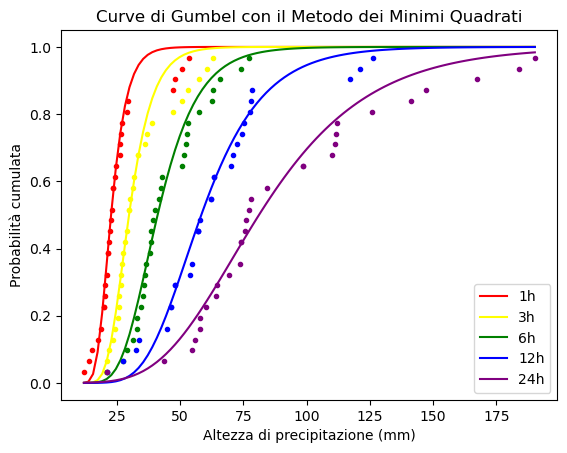

In [30]:
plt.rc('xtick', labelsize = 10) 
plt.rc('ytick', labelsize = 10)
graph = gb.plot(color = ["red","yellow","green","blue","purple"])
ecdf1h = ECDF(data["1h"])
graph.plot(data["1h"],ecdf1h(data["1h"]),'.',c="red",label="1h")
ecdf3h = ECDF(data["3h"])
graph.plot(data["3h"],ecdf3h(data["3h"]),'.',c="yellow",label="3h")
ecdf6h = ECDF(data["6h"])
graph.plot(data["6h"],ecdf6h(data["6h"]),'.',c="green",label="6h")
ecdf12h = ECDF(data["12h"])
graph.plot(data["12h"],ecdf12h(data["12h"]),'.',c="blue",label="12h")
ecdf24h = ECDF(data["24h"])
graph.plot(data["24h"],ecdf24h(data["24h"]),'.',c="purple",label="24h")
#graph.grid(True)
graph.set_title('Curve di Gumbel con il Metodo dei Minimi Quadrati')
graph.set_xlabel('Altezza di precipitazione (mm)')
graph.set_ylabel('Probabilità cumulata')

=>CONFRONTO GRAFICI:

Si può osservare come le curve plottate con il metodo dei minimi quadrati (soprattutto per quanto riguarda la durata di 1h) siano molto più sovrapposte ai dati di input rispetto alle curve plottate con gli altri due metodi. Questo perchè ogni metodo si sviluppa in maniera diversa. Nonostante ogni metodo sia valido, come è possibile, dunque, scegliere quale utilizzare per calcolare i parametri?

## 5-Test di Pearson

Dopo l'applicazione dei vari metodi di adattamento, risulteranno 3 coppie di  parametri. Per distinguere quali tra questi insiemi di parametri è il migliore, dobbiamo usare un criterio di confronto (un test non parametrico): il test di Pearson.

Questo test consiste, in sintesi, nel suddividere il campo di probabilità in k parti (per esempio uguali), nel derivarne una suddivisione del dominio, contando il numero di dati in ciascun intervallo e, infine, nel valutare la funzione del chi quadro, scegliendo la coppia di parametri per cui il chi quadro è più piccolo. Tutte le operazioni si riferiscono a una singola durata, e vanno perciò ripetute per ogni durata considerata.


Si definisce una funzione che calcola il X2.

In [31]:
def X2 (data, abs_t, h, delta):    
    dt = data[h].dropna()
    lh = len(dt)
    q = [delta * (i + 1) for i in range(int(1 / delta))]
    rv = gumbel_r(loc = abs_t.at["a",h], scale = abs_t.at["b",h])
    ecdf = ECDF(dt)
    r = ecdf(rv.ppf(q))
    o0 = lh*r
    o = o0 - np.append([0],np.delete(o0,-1))
    e = [delta*lh for i in range(len(r))]
    return ((o-e)**2/e).sum()  

Si costruisce un DataFrame contenente i valori di X2 corrispondenti ai vari metodi di interpolazione per ogni intervallo di tempo.

In [32]:
a = []
for h in data.columns:
    a.append([X2(data, abs_m, h, 0.2), X2(data, abs_mq, h, 0.2), X2(data, abs_mle, h, 0.2)])
   
a = pd.DataFrame(a, index=["1h","3h","6h","12h","24h"], columns=["M","Mq","MLE"])
a

,M,Mq,MLE
1h,7.000000,1.000000,3.000000
3h,5.000000,1.333333,3.333333
6h,1.000000,1.666667,1.000000
12h,5.666667,3.666667,5.666667
24h,3.000000,1.333333,3.000000


Nel precedente DataFrame si cercano i valori di X2 minimi in ciascuna riga e si può individuare il metodo di interpolazione migliore. Viene, quindi, costruito un dataframe che riunisce i parametri di Gumbel migliori.

In [33]:
best_param = []
for h in a.index:
    minX2 = 9999
    bestX2index = 0
    for i in a.columns:
        if a.loc[h][i] < minX2:
            minX2 = a.loc[h][i]
            bestX2index = i
    if bestX2index == 'M':
        best_param.append(abs_m[h])
    elif bestX2index == 'Mq':
        best_param.append(abs_mq[h])
    elif bestX2index == 'MLE':
        best_param.append(abs_mle[h])
best_param = pd.DataFrame(best_param,index = ["1h","3h","6h","12h","24h"], columns = ["a", "b"]).T
best_param

,1h,3h,6h,12h,24h
a,21.139413,27.459051,38.229037,52.322525,70.514944
b,4.300667,6.423864,10.858385,16.514748,29.077657


In [34]:
best_param.to_pickle("best_param")

In [35]:
gb=pd.DataFrame([gumbel(t_rain, best_param, "1h"), gumbel(t_rain, best_param, "3h"), gumbel(t_rain, best_param, "6h"), gumbel(t_rain, best_param, "12h"), gumbel(t_rain, best_param, "24h")]).T
gb.index=t_rain
gb.columns=["1h","3h","6h","12h","24h"]
gb

,1h,3h,6h,12h,24h
12.0,0.000231,0.000015,0.000014,0.000010,0.000564
13.8,0.004046,0.000229,0.000076,0.000033,0.000883
15.6,0.026632,0.001773,0.000323,0.000097,0.001347
17.4,0.092024,0.008338,0.001104,0.000252,0.002003
19.2,0.208084,0.026859,0.003123,0.000593,0.002908
...,...,...,...,...,...
183.0,1.000000,1.000000,0.999998,0.999634,0.979326
184.8,1.000000,1.000000,0.999999,0.999672,0.980555
186.6,1.000000,1.000000,0.999999,0.999706,0.981711
188.4,1.000000,1.000000,0.999999,0.999736,0.982799


Text(0, 0.5, 'Probabilità cumulata')

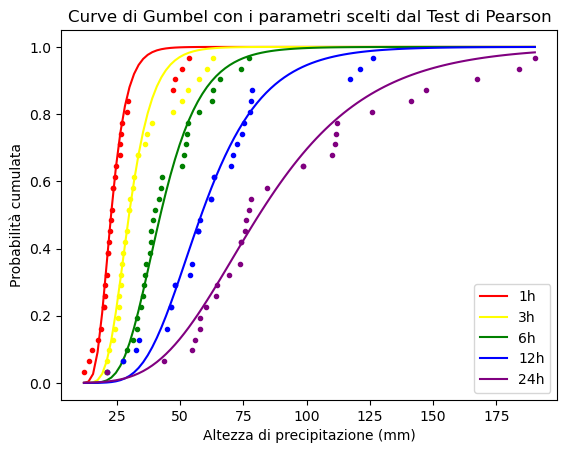

In [36]:
plt.rc('xtick', labelsize = 10) 
plt.rc('ytick', labelsize = 10)
graph=gb.plot(color=["red","yellow","green","blue","purple"])
ecdf1h = ECDF(data["1h"])
graph.plot(data["1h"],ecdf1h(data["1h"]),'.',c="red")
ecdf3h = ECDF(data["3h"])
graph.plot(data["3h"],ecdf3h(data["3h"]),".",c="yellow")
ecdf6h = ECDF(data["6h"])
graph.plot(data["6h"],ecdf6h(data["6h"]),".",c="green")
ecdf12h = ECDF(data["12h"])
graph.plot(data["12h"],ecdf12h(data["12h"]),".",c="blue")
ecdf24h = ECDF(data["24h"])
graph.plot(data["24h"],ecdf24h(data["24h"]),".",c="purple")
#graph.grid(True)
graph.set_title('Curve di Gumbel con i parametri scelti dal Test di Pearson')
graph.set_xlabel('Altezza di precipitazione (mm)')
graph.set_ylabel('Probabilità cumulata')

## 6-Stima delle curve di possibilità pluviometrica

Le curve di possibilità pluviometrica sono un modo di rappresentare l’altezza di precipitazione (che è funzione del tempo di ritorno e della durata considerata) come una legge di potenza:

$$ h(t_p, Tr) = a(T_r) t_p^n$$

$$\log h(t_p, Tr) = \log a(T_r) + n \log t_p $$
La procedura per ottenerle a partire dai dati sperimentali consiste in:                                                                                
-Per ogni durata di precipitazione disponibile si devono ottenere delle coppie (durata; pioggia cumulata);                                                  
-Per ogni durata si interpola una distribuzione di probabilità (Curva di Gumbel) ai dati;                                                                  
-Con la distribuzione di probabilità, assegnato il tempo di ritorno, si ottiene la probabilità (il numero);                                                
-Con il valore della probabilità ed invertendo la curva di probabilità, si ottiene il valore di altezza di precipitazione corrispondente a quella durata e a quella probabilità;                                                                                                                                
-Infine, con un metodo di regressione si interpolano i punti.

La rappresentazione delle curve di possibilità pluviometrica è molto particolare: si utilizza un grafico bilogaritmo ed è possibile notare che le curve, alla fine, sono tra loro parallele.

In [37]:
returnPeriod = [10, 20, 100]
q = [1 - 1 / returnPeriod[i] for i in range(0, len(returnPeriod))]
q

[0.9, 0.95, 0.99]

In [38]:
def qtls(gumbelParameters, qu):
    rvh = gumbel_r(loc = gumbelParameters["a"], scale = gumbelParameters["b"])
    return rvh.ppf(qu)

pts = []
for item in q:
    pts.append([qtls(best_param["1h"], item),
               qtls(best_param["3h"], item),
               qtls(best_param["6h"], item),
               qtls(best_param["12h"], item),
               qtls(best_param["24h"], item)])

ptsIndex = []
[ptsIndex.append('Tr = ' + str(returnPeriod[i])) for i in range(0, len(returnPeriod))]
pts = pd.DataFrame(pts, ptsIndex, columns = [1, 3, 6, 12, 24]).T
pts

,Tr = 10,Tr = 20,Tr = 100
1,30.817495,33.913235,40.923125
3,41.915104,46.539180,57.009782
6,62.664391,70.480560,88.179227
12,89.486775,101.374552,128.292831
24,135.950354,156.881264,204.276508


=>Interpolazione.

Text(0, 0.5, 'Altezza di precipitazione (mm)')

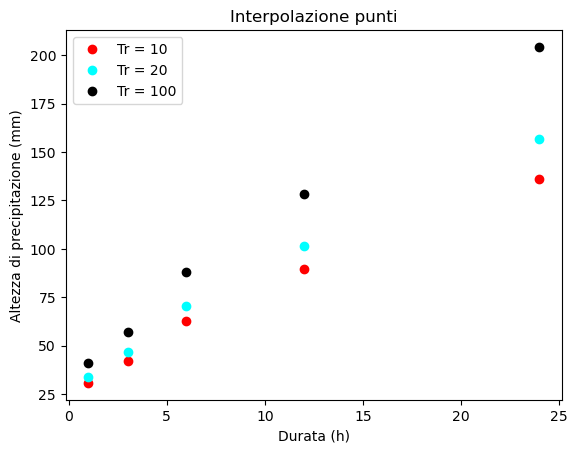

In [39]:
colors=["red", "cyan", "black", "green", "purple"]
graph = pts.plot(color=colors, style = "o")
#graph.grid(True)
graph.set_title('Interpolazione punti')
graph.set_xlabel('Durata (h)')
graph.set_ylabel('Altezza di precipitazione (mm)')

=>Si ottiene il valore della probabilità (dopo aver assegnato il valore del Tr).

In [40]:
poly = []
for i in range(0, len(returnPeriod)):
    in_ = np.polyfit(np.log(pts[ptsIndex[i]].index), np.log(pts[ptsIndex[i]]), 1)
    in_[1] = np.exp(in_[1])
    poly.append(in_)

In [41]:

fnl = pd.DataFrame(poly, ptsIndex, columns = ["n", "a"])
fnl

,n,a
Tr = 10,0.474001,27.958541
Tr = 20,0.488593,30.659093
Tr = 100,0.512065,36.805349


In [42]:
tp = np.linspace(0.5, 30, 100)
def heights (tp, a, n):
    return a*tp**n
h = [] 
[h.append(heights(tp, fnl["a"][ptsIndex[i]], fnl["n"][ptsIndex[i]])) for i in range(0, len(returnPeriod))]
inh = pd.DataFrame(h, ptsIndex, columns = tp).T
inh

,Tr = 10,Tr = 20,Tr = 100
0.500000,20.129174,21.851338,25.808572
0.797980,25.122251,27.458271,32.788716
1.095960,29.199618,32.062889,38.573438
1.393939,32.725499,36.060846,43.628795
1.691919,35.872918,39.640952,48.178824
...,...,...,...
28.808081,137.507357,158.368344,205.720416
29.106061,138.179715,159.166604,206.807300
29.404040,138.848463,159.960695,207.888769
29.702020,139.513655,160.750682,208.964903


=>Si plottano i valori del DataFrame.

Text(0, 0.5, 'Altezza di precipitazione (mm)')

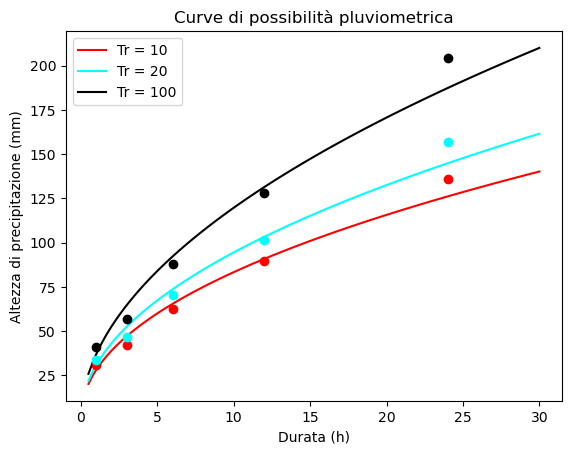

In [43]:
graph = inh.plot(color=colors)
[graph.plot(pts[ptsIndex[i]], "o", color=colors[i]) for i in range(0, len(returnPeriod))]
plt.rc('xtick', labelsize = 10) 
plt.rc('ytick', labelsize = 10)
#graph.grid(True)
graph.set_title('Curve di possibilità pluviometrica')
graph.set_xlabel('Durata (h)')
graph.set_ylabel('Altezza di precipitazione (mm)')

=>Infine, si trasferiscono le curve plottate in un grafico bilogaritmico, osservando che le curve diventano parallele.

Text(0, 0.5, 'Altezza di precipitazione (mm)')

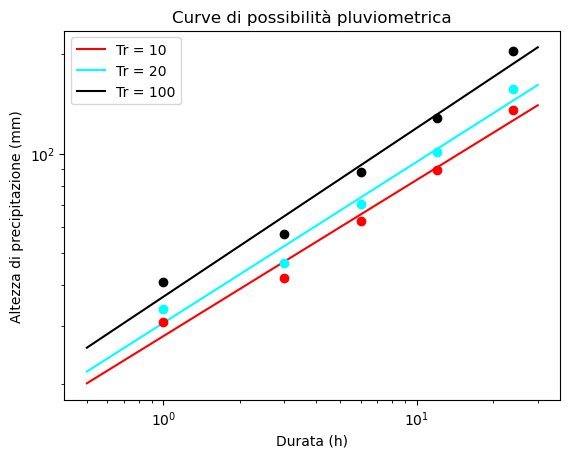

In [44]:
graph = inh.plot(color=colors)
graph.set_yscale('log')
graph.set_xscale('log')
[graph.plot(pts[ptsIndex[i]], "o", color=colors[i]) for i in range(0, len(returnPeriod))]
plt.rc('xtick', labelsize = 10) 
plt.rc('ytick', labelsize = 10)
#graph.grid(True)
graph.set_title('Curve di possibilità pluviometrica')
graph.set_xlabel('Durata (h)')
graph.set_ylabel('Altezza di precipitazione (mm)')